In [65]:
import torch 
import torch.nn as nn
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt

### 基本方法

In [6]:
#如何判断一个对象是否为Tensor张量
obj = np.arange(1,10)
print(torch.is_tensor(obj))
obj1 = torch.Tensor(10)
print(torch.is_tensor(obj1))

False
True


In [16]:
#如何全局设置Tensor数据类型？
torch.set_default_tensor_type(torch.DoubleTensor)
print(torch.Tensor(2).dtype)

torch.float64


In [26]:
#如何判断一个对象是否为Pytorch Storage对象
#torch.Storage is a contiguous, one-dimensional array of a single data type.
print(torch.is_storage(obj))
storage = torch.DoubleStorage([2,3])
print(torch.is_storage(storage))

False
True


In [33]:
#如何获取Tensor中元素的个数
a = torch.Tensor(3,4)
print(torch.numel(a))

12


In [52]:
#如何设置打印选项？
#precision=None, threshold=None, edgeitems=None, linewidth=None, profile=None
torch.set_printoptions(precision=5,threshold=100,linewidth=100,edgeitems=4)
print(torch.DoubleTensor(10,4))

tensor([[ 6.95231e-310,  6.95231e-310,  6.95229e-310,  4.52355e+257],
        [ 1.28626e+248,  2.43209e-152,   1.53250e-94,  2.14728e+243],
        [  0.00000e+00,  4.77497e+180,  6.95231e-310,  6.95231e-310],
        [ 6.95229e-310,   2.57664e+97,   1.72733e+97,  2.25153e-310],
        [ 6.84979e+180, -3.50707e-311,   0.00000e+00,  2.04737e+190],
        [ 6.95231e-310,  6.95231e-310,  6.95229e-310,  9.82202e+252],
        [ 6.16779e+223,  2.41318e+185,  1.67772e+243,   1.52781e-94],
        [  0.00000e+00,  1.99502e+161,  6.95231e-310,  6.95231e-310],
        [ 6.95229e-310,  4.24336e+175,  1.06025e-153,  7.36507e+228],
        [ 4.67352e+257,  1.30489e+180,   0.00000e+00,   0.00000e+00]])


In [99]:
#如何创建单位矩阵
a = torch.eye(3,3)
print(a)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [81]:
#如何从numpy多维数组创建Tensor张量
a = np.arange(1,20,2)
print(torch.from_numpy(a))
b = np.ndarray((2,3))
print(torch.from_numpy(b))

tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19], dtype=torch.int32)
tensor([[6.95232e-310, 6.95232e-310, 6.95232e-310],
        [6.95232e-310, 6.95232e-310, 6.95232e-310]])


In [77]:
#如何创建等差数列
b =  torch.Tensor()
print(torch.linspace(1,9,5,requires_grad=True))

tensor([1., 3., 5., 7., 9.], requires_grad=True)


In [84]:
#和linspace类似的logspace
print(torch.logspace(1,5,5,requires_grad=True))

tensor([1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04, 1.00000e+05], requires_grad=True)


In [86]:
#如何创建元素全部为1的矩阵
print(torch.ones(2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [93]:
#如何创建0,1均匀的随机矩阵，形状可以指定
print(torch.rand(2,3,requires_grad=True))

tensor([[0.12264, 0.37531, 0.02611],
        [0.38838, 0.80195, 0.34111]], requires_grad=True)


In [92]:
#如何创建标准正太分布随机矩阵？形状可以指定
print(torch.randn(2,3))

tensor([[ 0.92620, -2.99641,  0.71482],
        [-1.12788, -0.43067,  0.58641]])


In [96]:
#如何创建随机整数序列，如同numpy.random.permutation?
print(numpy.random.permutation(10))
print(torch.randperm(10))

[2 6 1 7 0 5 4 3 9 8]
tensor([2, 3, 8, 7, 9, 4, 6, 5, 1, 0])


In [98]:
#如何创建一个列表如同numpy中的arange?
print(np.arange(1,10,3))
print(torch.arange(1,10,3))

[1 4 7]
tensor([1, 4, 7])


In [100]:
#如何创建一个全0的矩阵？
print(torch.zeros(2,2))

tensor([[0., 0.],
        [0., 0.]])


### 索引、切片、拼接及换位方法

In [218]:
#如何将多个Tensor按照某一维度拼接起来？
tensor = torch.ones(2,3)
print(torch.cat([tensor,tensor]))
print(torch.cat([tensor,tensor,tensor],dim=1))
#stack方法也可以进行tensor的拼接
print(torch.stack([tensor,tensor],dim=2))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])


In [145]:
#如何将一个Tensor按照指定维度切片成n个分片？
#按照第二维度将tensor切分为5个tensor
x = torch.ones(2,10)
print(torch.chunk(x,5,dim=1))

(tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]))
(tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1.],
        [1., 1.]]))


In [115]:
#如何按照索引进行元素的聚合？
#如何将元素33,66,88,99聚合在一起?
#第一个参数是源tensor,第二个参数为维度，第三个参数为索引
x = torch.Tensor([[33,66,9],[1,99,88]])
torch.gather(x,1,torch.LongTensor([[0,1],[2,1]]))

tensor([[33., 66.],
        [88., 99.]])

In [125]:
#如何按照索引选择目标数据？
#如何取出第2、4、6列数据，返回新的tensor
x = torch.randn(2,7)
print(x)
#第一个参数为源tensor,第二个参数为维度，第三个参数为该维度上的索引
y = torch.index_select(x,1,torch.LongTensor([1,3,5]))
print(y)
z = torch.index_select(x,0,torch.LongTensor([1]))
print(z)

tensor([[-0.26020,  0.48570, -0.49547,  1.57589, -0.17201,  0.11631,  0.48189],
        [-0.35056, -0.31785,  0.14796, -2.50720,  0.99119,  0.89042, -1.62519]])
tensor([[ 0.48570,  1.57589,  0.11631],
        [-0.31785, -2.50720,  0.89042]])
tensor([[-0.35056, -0.31785,  0.14796, -2.50720,  0.99119,  0.89042, -1.62519]])


In [131]:
#如何选出满足条件的所有元素
#masked_select方法，返回mask标志为1的所有元素组成的1维Tensor
x = torch.rand(2,4)
print(x)
mask = x.ge(0.5)
print(mask)
torch.masked_select(x,mask)

tensor([[0.18211, 0.72952, 0.85274, 0.14525],
        [0.00986, 0.32629, 0.65850, 0.44055]])
tensor([[0, 1, 1, 0],
        [0, 0, 1, 0]], dtype=torch.uint8)


tensor([0.72952, 0.85274, 0.65850])

In [141]:
#如何找出矩阵中非零元素的索引？
#nonzero方法返回非零的索引，结果tensor为二维tensor，行数等于源tensor中非零元素个数，列数等于源tensor的维度
x = torch.Tensor([[[0.0,11],[66,88]],[[22,33],[0.0,0.1]]])
print(x)
torch.nonzero(x)

tensor([[[ 0.00000, 11.00000],
         [66.00000, 88.00000]],

        [[22.00000, 33.00000],
         [ 0.00000,  0.10000]]])


tensor([[0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 1]])

In [165]:
#如何将输入张量分割成相大小的chunks?
x = torch.ones(2,10)
print(x)
#每个块5个长度的元素，dim表示按第二维度
print(torch.split(x,5,dim=1))
#也可指定一个划分列表，依次表示有1,2,3,4个长度
print(torch.split(x,[1,2,3,4],dim=1))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
(tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]), tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))
(tensor([[1.],
        [1.]]), tensor([[1., 1.],
        [1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]))


In [236]:
#如何给矩阵增加维度
x = torch.Tensor([1,2,3,4,5,6])
#dim关键字参数指定在第几维度增加`[]`
y = x.unsqueeze(dim=0)
print(y)
z = x.unsqueeze(dim=1)
print(z)
print(torch.unsqueeze(x,dim=0))

tensor([[1., 2., 3., 4., 5., 6.]])
tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
tensor([[1., 2., 3., 4., 5., 6.]])


In [234]:
#如何去掉`[]`降低维度？去维度为1的
x = torch.Tensor([[[0,2,3,4],[22,33,44,55]]])
print(x,x.shape)
#dim关键字参数指定在地接个维度是`1`,squeeze将去除掉这个维度
y = torch.squeeze(x,dim=0)
print(y,y.shape)
z = x.squeeze(dim=0)
print(z,z.shape)

tensor([[[ 0.,  2.,  3.,  4.],
         [22., 33., 44., 55.]]]) torch.Size([1, 2, 4])
tensor([[ 0.,  2.,  3.,  4.],
        [22., 33., 44., 55.]]) torch.Size([2, 4])
tensor([[ 0.,  2.,  3.,  4.],
        [22., 33., 44., 55.]]) torch.Size([2, 4])


In [238]:
#如何实现tensor维度之间的转置
#tensor自身的t和transpose方法跟torch上的t和transpose方法功能类似
x = torch.randn(2,1)
print(x,x.shape)
y = torch.t(x)
print(y,y.shape)
z = torch.transpose(x,1,0)
print(z,z.shape)
print(x.t())
print(x.transpose(1,0))

tensor([[ 1.18556],
        [-0.02856]]) torch.Size([2, 1])
tensor([[ 1.18556, -0.02856]]) torch.Size([1, 2])
tensor([[ 1.18556, -0.02856]]) torch.Size([1, 2])
tensor([[ 1.18556, -0.02856]])
tensor([[ 1.18556, -0.02856]])


In [248]:
#unbind删除某一维度之后，返回所有切片组成的元祖列表
x = torch.rand(2,2,2)
print(x)
print(torch.unbind(x,dim=1))

tensor([[[0.90266, 0.19014],
         [0.64815, 0.87569]],

        [[0.94966, 0.53289],
         [0.94499, 0.76736]]])
(tensor([[0.90266, 0.19014],
        [0.94966, 0.53289]]), tensor([[0.64815, 0.87569],
        [0.94499, 0.76736]]))


### 随机抽样

In [280]:
#手动设置随机种子
torch.manual_seed(123)
#如果没有手动设置随机种子，则返回系统生成的随机种子；否则返回手动设置的随机种子
seed = torch.initial_seed()
print("seed:{}".format(seed))
#返回随机生成器状态
state = torch.get_rng_state()
print("state:{}".format(state),len(state))

seed:123
state:tensor([123,   0,   0,   0,  ...,   0,   0,   0,   0], dtype=torch.uint8) 5048


In [304]:
#伯努利分布，结果只有0和1，第一个参数是概率p,并且0<=p<=1,
torch.manual_seed(123)
a = torch.rand(3, 3)
print(a)
b = torch.bernoulli(a)
print(b)

tensor([[0.36890, 0.01337, 0.59178],
        [0.09264, 0.47245, 0.52203],
        [0.60508, 0.53130, 0.94855]])
tensor([[1., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.]])


In [361]:
#多项式分布抽样
#torch.multimomial第一个参数为多项式权重，可以是向量也可以为矩阵，有权重决定对`下标`的抽样
#为向量：replacement表示是否有放回的抽样，如果为True，结果行数为1，列数有num_samples指定；否则行数为1，列数<=权重weights长度
weights1 = torch.Tensor([20, 10, 3, 2])
a = torch.multinomial(weights,num_samples=3,replacement=False)
b = torch.multinomial(weights,num_samples=10,replacement=True)
print(a)
print(b)
#为矩阵：replacement表示是否有放回的抽样，如果为True，结果行数为weights行数，列数由num_samples指定；
#否则行数为weights行数，列数<=权重weights每一行长度
weights2 = torch.Tensor([[20, 10, 3, 2],[30,4,5,60]])
c = torch.multinomial(weights,num_samples=15,replacement=True)
d = torch.multinomial(weights,num_samples=4,replacement=False)
print(c)
print(d)

tensor([[0, 1, 2],
        [3, 0, 2]])
tensor([[0, 0, 1, 0, 0, 1, 3, 0, 0, 2],
        [3, 3, 3, 3, 3, 3, 0, 3, 3, 0]])
tensor([[0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1],
        [3, 3, 3, 2, 0, 0, 3, 0, 0, 0, 2, 2, 3, 3, 3]])
tensor([[1, 0, 2, 3],
        [0, 3, 1, 2]])


tensor([ 0.4248,  0.3964,  0.4494,  ...,  0.9055,  0.2543, -0.3518])
tensor([ 0.5807,  0.4270, -0.2506,  0.2640,  0.1797,  0.4377,  1.1154,  0.6373,
         0.4479])
tensor([0.0370, 0.2305, 0.3554, 0.6012, 0.6571, 1.5476, 0.1952, 0.6846, 2.8770])


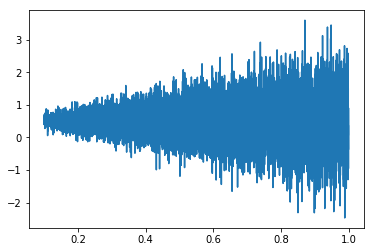

In [19]:
#从正太分布中抽取随机数
#均值为0.5，方差为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]
x = torch.normal(mean=0.5, std=torch.arange(0.1, 1, 0.0001))
print(x)
#均值为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]，方差为0.5
y = torch.normal(mean=torch.arange(0.1,1,0.1),std=0.5)
print(y)
#均值为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]
#方差为[0.10000, 0.20000, 0.30000, 0.40000, 0.50000, 0.60000, 0.70000, 0.80000, 0.90000]
z = torch.normal(mean=torch.arange(0.1,1,0.1),std=torch.arange(0.1,1,0.1))
print(z)
plt.plot(torch.arange(0.1, 1, 0.0001).data.numpy(),x.data.numpy())
plt.show()

### 序列化与反序列化

In [8]:
#序列化模型
x = torch.randn(2,3)
#序列化torch.save方法
torch.save(x,"randn")
#反序列化torch.load方法
x_load = torch.load("randn")
print(x_load)

tensor([[ 0.6560, -1.4981,  0.7547],
        [ 0.6677,  0.4550,  1.3934]])


### 并行化

In [28]:
#torch默认的线程数量等于计算机内核个数
threads = torch.get_num_threads()
print(threads)
#可通过set_num_threads方法，设置并发数
torch.set_num_threads(4)
threads_1 = torch.get_num_threads()
print(threads_1)

6
4


### 元素级别的数学运算

In [78]:
#求元素绝对值
a = torch.Tensor([-1,-0.5,-0.123,0.4,0.5,0.99])
print(torch.abs(a))
#每个元素加“n”
print(torch.add(a,3))
#余弦
print(torch.cos(a))
#反余弦
print(torch.acos(a))

tensor([1.0000, 0.5000, 0.1230, 0.4000, 0.5000, 0.9900])
tensor([2.0000, 2.5000, 2.8770, 3.4000, 3.5000, 3.9900])
tensor([0.5403, 0.8776, 0.9924, 0.9211, 0.8776, 0.5487])
tensor([3.1416, 2.0944, 1.6941, 1.1593, 1.0472, 0.1415])


In [51]:
#tensor相除再相加:a+0.1*tensor_a/tensor_b,返回新的结果;需要注意的是a元素个数需要等于tensor_a/tensor_b元素个数
x = torch.addcdiv(a,0.1,torch.Tensor([4,9,4,6,7,3]),torch.Tensor([2,1,2,3,7,1]))
print(x)
#tensor相乘再相加:a+0.1*tensor_a*tensor_b,返回新的tensor;需要注意的是a元素个数需要等于tensor_a*tensor_b元素个数
y = torch.addcmul(a,0.1,torch.Tensor([4,9,4,6,7,3]),torch.Tensor([2,1,2,3,7,1]))
print(y)

tensor([-0.8000,  0.4000,  0.0770,  0.6000,  0.6000,  1.2900])
tensor([-0.2000,  0.4000,  0.6770,  2.2000,  5.4000,  1.2900])


In [143]:
#向上取整
x = torch.Tensor([[-9.12,-1.9,-8,-0.3,1.51],[1.2,3.8,4.01,8.88,-7.6]])
print(torch.ceil(x))
#向下取整
print(torch.floor(x))
#夹逼函数，将每个元素限制在给定区间范围内,小于范围下限的被强制设置为下限值；大于上限的被强制设置为上限值
print(torch.clamp(x,-5.5,5.5))
#乘法
print(torch.mul(x,0.1))
#取相反数
print(torch.neg(x))
#取倒数
print(torch.reciprocal(x))
#取平方根倒数：每个元素的平方根倒数
print(torch.rsqrt(x[x>0]))
#求平方根
print(torch.sqrt(torch.Tensor([4,16])))


tensor([[-9., -1., -8., -0.,  2.],
        [ 2.,  4.,  5.,  9., -7.]])
tensor([[-10.,  -2.,  -8.,  -1.,   1.],
        [  1.,   3.,   4.,   8.,  -8.]])
tensor([[-5.5000, -1.9000, -5.5000, -0.3000,  1.5100],
        [ 1.2000,  3.8000,  4.0100,  5.5000, -5.5000]])
tensor([[-0.9120, -0.1900, -0.8000, -0.0300,  0.1510],
        [ 0.1200,  0.3800,  0.4010,  0.8880, -0.7600]])
tensor([[ 9.1200,  1.9000,  8.0000,  0.3000, -1.5100],
        [-1.2000, -3.8000, -4.0100, -8.8800,  7.6000]])
tensor([[-0.1096, -0.5263, -0.1250, -3.3333,  0.6623],
        [ 0.8333,  0.2632,  0.2494,  0.1126, -0.1316]])
tensor([0.8138, 0.9129, 0.5130, 0.4994, 0.3356])
tensor([2., 4.])


In [125]:
#除法
x =torch.Tensor([4,9])
y = torch.div(x,3)
print(y)
z = torch.div(x,y)
print(z)
#计算除法余数fmod和remainder方法,相当于python中的%算子
q = torch.Tensor([2.1,2.3,5,6,7])
print(torch.fmod(q,2))
print(torch.remainder(q,2))
#返回浮点数的小数部分
print(torch.frac(q))
#四舍五入
print(torch.round(y))
#指数运算
a = torch.exp(torch.Tensor([0,math.log(2)]))
print(a)

tensor([1.3333, 3.0000])
tensor([3., 3.])
tensor([0.1000, 0.3000, 1.0000, 0.0000, 1.0000])
tensor([0.1000, 0.3000, 1.0000, 0.0000, 1.0000])
tensor([0.1000, 0.3000, 0.0000, 0.0000, 0.0000])
tensor([1., 3.])
tensor([1., 2.])


In [122]:
#自然对数
x = torch.Tensor([math.e,math.e**2])
print(torch.log(x))
#对输入x加1平滑处理后再求log
print(torch.log1p(x))
#2为底的对数
print(torch.log2(x))
#10为底的对数
print(torch.log10(x))
#幂运算
print(torch.pow(x,1),torch.pow(x,2))

tensor([1., 2.])
tensor([1.3133, 2.1269])
tensor([1.4427, 2.8854])
tensor([0.4343, 0.8686])
tensor([2.7183, 7.3891]) tensor([ 7.3891, 54.5982])


In [123]:
#线性插值：outi=starti+weight∗(endi−starti)
#带`_`线的方法为in-place类型算子，不会创建新的tensor而是改变原tensor的值
x = torch.zeros(10).fill_(10)
print(x)
y = torch.arange(10).float()
print(y)
z = torch.lerp(x,y,0.5)
print(z)

tensor([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([5.0000, 5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000,
        9.5000])


In [145]:
#求每个元素的sigmod值
#sigmod计算公式为1/(x+maht.e^(-x))
#sigmod值位于[0,1],可视为概率值，在激活函数中应用较广
x = torch.arange(-5,5,1).float()
print(x)
print(torch.sigmoid(x))
#符号函数，根据元素的正负，返回+1和-1,元素0 返回0
print(torch.sign(x))
#截断值（标量x的截断值是最接近其的整数，其比x更接近零。简单理解就是截取小数点前面的数）
print(torch.trunc(torch.Tensor([-0.9,-1.2,-1.9,0,2.1,2.7])))

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])
tensor([0.0067, 0.0180, 0.0474, 0.1192, 0.2689, 0.5000, 0.7311, 0.8808, 0.9526,
        0.9820])
tensor([-1., -1., -1., -1., -1.,  0.,  1.,  1.,  1.,  1.])
tensor([-0., -1., -1.,  0.,  2.,  2.])


### 规约计算

In [188]:
#计算累积(Cumulative),可以通过dim指定沿着某一个维度计算累积
x = torch.Tensor([[2,3,4,5,6],[9,8,7,6,5]])
print(x)
print(torch.cumprod(x,dim=1))
print(torch.cumprod(x,dim=0))
#计算累和
print(torch.cumsum(x,dim=1))
print(torch.cumsum(x,dim=0))
#计算所有元素的乘积
print(torch.prod(x,dim=1))
print(torch.prod(x,dim=0))
#计算所有元素的和
print(torch.sum(x))
print(torch.sum(x,dim=1))

tensor([[2., 3., 4., 5., 6.],
        [9., 8., 7., 6., 5.]])
tensor([[2.0000e+00, 6.0000e+00, 2.4000e+01, 1.2000e+02, 7.2000e+02],
        [9.0000e+00, 7.2000e+01, 5.0400e+02, 3.0240e+03, 1.5120e+04]])
tensor([[ 2.,  3.,  4.,  5.,  6.],
        [18., 24., 28., 30., 30.]])
tensor([[ 2.,  5.,  9., 14., 20.],
        [ 9., 17., 24., 30., 35.]])
tensor([[ 2.,  3.,  4.,  5.,  6.],
        [11., 11., 11., 11., 11.]])
tensor([  720., 15120.])
tensor([18., 24., 28., 30., 30.])
tensor(55.)
tensor([20., 35.])


In [174]:
#距离公式，常用于模型损失值的计算。计算采用p-norm范数。p=1为曼哈顿距离；p=2为欧氏距离,默认为计算欧式距离
x = torch.Tensor([[2,3,4,5,6],[9,8,7,6,5]])
y = torch.Tensor([[2,3,4,5,6],[4,5,7,6,5]])
print(torch.dist(x,y,p=0))
print(torch.dist(x,y,p=1))
print(torch.dist(x,y,p=2))
print(torch.dist(x,y,np.inf))
#norm范数
print(torch.norm(x,p=1,dim=1))
print(torch.norm(x,p=1,dim=0))
print(torch.norm(x,p=2,dim=1))
print(torch.norm(x,p=2,dim=0))

tensor(2.)
tensor(8.)
tensor(5.8310)
tensor(5.)
tensor([20., 35.])
tensor([11., 11., 11., 11., 11.])
tensor([ 9.4868, 15.9687])
tensor([9.2195, 8.5440, 8.0623, 7.8102, 7.8102])


In [196]:
#均值·中位数·众数·方差·标准差
#均值
x = torch.Tensor([[2,3,4,5,6],[9,8,7,6,5]])
print(torch.mean(x))
print(torch.mean(x,dim=1))
print(torch.mean(x,dim=0))
#中位数，指定dim将返回两个tensor，第一个是中位数，第二个tensor为index索引
print(torch.median(x))
print(torch.median(x,dim=1))
#众数
print(torch.mode(x))
#方差
print(torch.var(x))
print(torch.var(x,dim=0))
#标准差
print(torch.std(x))
print(torch.std(x,dim=0))

tensor(5.5000)
tensor([4., 7.])
tensor([5.5000, 5.5000, 5.5000, 5.5000, 5.5000])
tensor(5.)
(tensor([4., 7.]), tensor([2, 2]))
(tensor([2., 5.]), tensor([0, 4]))
tensor(4.7222)
tensor([24.5000, 12.5000,  4.5000,  0.5000,  0.5000])
tensor(2.1731)
tensor([4.9497, 3.5355, 2.1213, 0.7071, 0.7071])


### 数值比较运算

In [213]:
#元素相等比较，相等返回1，不相等返回0
x = torch.Tensor([[2,3,5],[4,7,9]])
y = torch.Tensor([[2,4,5],[4,8,9]])
z = torch.Tensor([[2,3,5],[4,7,9]])
print(torch.eq(x,y))
#比较两个Tensor是否相等
print(torch.equal(x,z))
print(torch.equal(x,y))
#逐一比较tensor1中元素是否大于等于tensor2中元素。
print(torch.ge(x,y))
#逐一比较tensor1中元素是否大于tensor2中元素。
print(torch.gt(x,y))
#逐一比较tensor1中元素是否小于等于tensor2中的元素
print(torch.le(x,y))
#逐一比较tensor1中元素是否小于tensor2中元素。
print(torch.lt(x,y))
#逐一比较两个tensor值不相等
print(torch.ne(x,y))

tensor([[1, 0, 1],
        [1, 0, 1]], dtype=torch.uint8)
True
False
tensor([[1, 0, 1],
        [1, 0, 1]], dtype=torch.uint8)
tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)
tensor([[0, 1, 0],
        [0, 1, 0]], dtype=torch.uint8)
tensor([[0, 1, 0],
        [0, 1, 0]], dtype=torch.uint8)


In [212]:
#最大值·最小值
x = torch.Tensor([[2,3,5],[4,7,9]])
print(torch.max(x))
#若指定了dim，返回两个tensor，第一个tensor为指定维度上的最大值；第二个tensor为指定维度上对应最大值所在的索引
print(torch.max(x,dim=1))
#最小值
print(torch.min(x))
print(torch.min(x,dim=0))

tensor(9.)
(tensor([5., 9.]), tensor([2, 2]))
tensor(2.)
(tensor([2., 3., 5.]), tensor([0, 0, 0]))


In [218]:
#排序
x = torch.Tensor([[20,3,5],[4,70,9]])
#不指定dim，则默认按shape(-1)最后维度所在的方向进行升序排列；返回值第二个tensor为排序索引组成的tensor
print(torch.sort(x))
#指定descending关键字参数，设定升序还是降序
print(torch.sort(x,dim=0,descending=True))

(tensor([[ 3.,  5., 20.],
        [ 4.,  9., 70.]]), tensor([[1, 2, 0],
        [0, 2, 1]]))
(tensor([[20., 70.,  9.],
        [ 4.,  3.,  5.]]), tensor([[0, 1, 1],
        [1, 0, 0]]))


In [224]:
#topK选择最大的或者最小的K个元素作为返回值
x = torch.Tensor([[20,3,5],[4,70,9]])
#k关键字参数指定返回最大后最小的几个元素,默认取最大的元素
print(torch.topk(x,k=2))
#largest设置为false表示取最小的topk值
print(torch.topk(x,k=2,largest=False))
#指定dim关键字参数则表示沿着dim维度所在的方向取topk
print(torch.topk(x,k=2,dim=0))
print(torch.topk(x,k=2,dim=1))

(tensor([[20.,  5.],
        [70.,  9.]]), tensor([[0, 2],
        [1, 2]]))
(tensor([[3., 5.],
        [4., 9.]]), tensor([[1, 2],
        [0, 2]]))
(tensor([[20., 70.,  9.],
        [ 4.,  3.,  5.]]), tensor([[0, 1, 1],
        [1, 0, 0]]))
(tensor([[20.,  5.],
        [70.,  9.]]), tensor([[0, 2],
        [1, 2]]))


tensor([19., 16., 21., 19., 19., 18., 15., 29., 23., 21.])


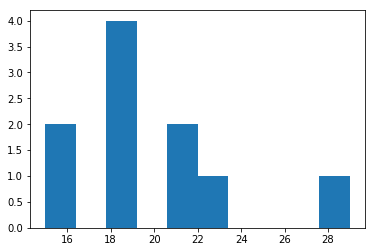

In [376]:
#直方图操作
#计算输入张量的直方图。以min和max为range边界，将其均分成bins个直条，然后将排序好的数据划分到各个直条(bins)中。
#如果min和max都为0, 则利用数据中的最大最小值作为边界。
x = torch.rand(200)
y = torch.histc(x,min=0,max=1,bins=10)
print(y)
plt.hist(y)
plt.show()

### 矩阵运算

In [251]:
#对角矩阵
a = torch.rand(2)
print(a)
#diag设置对角矩阵，diagnal等于0，设置主对角线
x = torch.diag(a,diagonal=0)
print(x)
#diagnal大于0，设置主对角线之上diagnal对应位置的值
x = torch.diag(a,diagonal=2)
print(x)
#diagnal小于0，设置主对角线之下diagnal对应的值
x = torch.diag(a,diagonal=-1)
print(x)

tensor([0.5476, 0.7343])
tensor([[0.5476, 0.0000],
        [0.0000, 0.7343]])
tensor([[0.0000, 0.0000, 0.5476, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7343],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.5476, 0.0000, 0.0000],
        [0.0000, 0.7343, 0.0000]])


In [289]:
#数据按维度规范
x = torch.Tensor([[2,2.22,2.222]])
print(x)
#p指定p-norm范数，dim指定方向，maxnorm指定p-norm范数的最大值
print(torch.renorm(x,p=1,dim=0,maxnorm=2))
print(torch.renorm(x,p=2,dim=0,maxnorm=1))

tensor([[2.0000, 2.2200, 2.2220]])
tensor([[0.6209, 0.6892, 0.6898]])
tensor([[0.5371, 0.5962, 0.5967]])


In [294]:
#矩阵的迹
#二维矩阵主对角线上元素之和
x = torch.randn(2,4)
print(x)
print(torch.trace(x))

tensor([[-0.1204, -0.6686,  0.0600, -1.4658],
        [ 1.5003, -0.8799,  2.1509,  0.2911]])
tensor(-1.0003)


In [302]:
#下三角矩阵
#参数diagonal控制对角线: diagonal = 0, 主对角线 ;diagonal > 0, 主对角线之上 ;diagonal < 0, 主对角线之下
x = torch.randn(2,5)
print(torch.tril(x))
print(torch.tril(x,diagonal=2))
print(torch.tril(x,diagonal=-1))
#上三角矩阵
#参数diagonal控制对角线: diagonal = 0, 主对角线 ;diagonal > 0, 主对角线之上 ;diagonal < 0, 主对角线之下
print(torch.triu(x))
print(torch.triu(x,diagonal=4))
print(torch.triu(x,diagonal=-1))

tensor([[0.7409, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8660, 0.2698, 0.0000, 0.0000, 0.0000]])
tensor([[ 0.7409,  0.4724, -0.5798,  0.0000,  0.0000],
        [ 0.8660,  0.2698,  0.7263, -0.8031,  0.0000]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8660, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[ 0.7409,  0.4724, -0.5798, -0.2482,  0.9088],
        [ 0.0000,  0.2698,  0.7263, -0.8031, -1.6912]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9088],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[ 0.7409,  0.4724, -0.5798, -0.2482,  0.9088],
        [ 0.8660,  0.2698,  0.7263, -0.8031, -1.6912]])


In [375]:
#bmm矩阵乘积
#矩阵A的列数需等于矩阵B的行数
#1*2*3
x = torch.Tensor([[[1,2,3],[4,5,6]]])
print(x.shape)
#1*3*1
y = torch.Tensor([[[9],[8],[7]]])
print(y.shape)
#res 1*2*1
print(torch.bmm(x,y),torch.bmm(x,y).squeeze(0).squeeze(1))
#注意和mm的区别bmm为batch matrix multiplication,二mm维matrix multiplication
print(torch.mm(x.squeeze(0),y.squeeze(0)))
#计算两个一维张量的点积torch.dot,两个向量对应位置相乘再相加
x = torch.Tensor([1,2,3,4])
y = torch.Tensor([4,3,2,1])
print(torch.dot(x,y))

torch.Size([1, 2, 3])
torch.Size([1, 3, 1])
tensor([[[ 46.],
         [118.]]]) tensor([ 46., 118.])
tensor([[ 46.],
        [118.]])
tensor(20.)


In [323]:
#矩阵相乘再相加
#addmm方法用于两个矩阵相乘结果再加到M矩阵，用beta调节M矩阵权重；用alpha调节矩阵乘积结果系数。
#两个相乘的矩阵维度为2，分别表示[width，length]，第一个矩阵的length应该等于第二个矩阵的width满足矩阵相乘条件
#out=(beta∗M)+(alpha∗mat1·mat2)
x = torch.Tensor([[1,2]])
print(x.shape)
#batch1:1*1*3
batch1 = torch.Tensor([[1,2,3]])
print(batch1.shape)
#batch2:1*3*2
batch2 = torch.Tensor([[1,2],[3,4],[5,6]])
print(batch2.shape)
print(torch.addmm(x,batch1,batch2,beta=0.1,alpha=5))

torch.Size([1, 2])
torch.Size([1, 3])
torch.Size([3, 2])
tensor([[110.1000, 140.2000]])


In [324]:
#批矩阵相乘再相加
#addbmm方法用于批矩阵相乘结果再加到M矩阵，用beta调节M矩阵权重；用alpha调节矩阵乘积结果系数。
#两个相乘的矩阵维度为3，分别表示[batchsize,width，length]，第一个矩阵的length应该等于第二个矩阵的width满足矩阵相乘条件
#两个相乘矩阵batchsize应该相等。
#res=(beta∗M)+(alpha∗sum(batch1i·batch2i,i=0,b))
#1*2
x = torch.Tensor([[1,2]])
print(x.shape)
#batch1:1*1*3
batch1 = torch.Tensor([[[1,2,3]]])
print(batch1.shape)
#batch2:1*3*2
batch2 = torch.Tensor([[[1,2],[3,4],[5,6]]])
print(batch2.shape)
print(torch.addbmm(x,batch1,batch2,beta=0.1,alpha=10))

torch.Size([1, 2])
torch.Size([1, 1, 3])
torch.Size([1, 3, 2])
tensor([[220.1000, 280.2000]])


In [352]:
#矩阵乘向量再相加
#addmv方法用于矩阵和向量相乘结果再加到M矩阵，用beta调节M矩阵权重；用alpha调节矩阵同向量乘积结果。
#矩阵的列应该等于向量长度以满足相乘条件
# out=(beta∗tensor)+(alpha∗(mat·vec))
#1*3
x = torch.Tensor([1,2,3])
print(x.shape)
#batch1:1*3
mat = torch.Tensor([[1],[2],[3]])
print(mat.shape)
#batch2:
vec = torch.Tensor([3])
print(vec.shape)
print(torch.addmv(x,mat,vec,beta=100,alpha=10))

torch.Size([3])
torch.Size([3, 1])
torch.Size([1])
tensor([130., 260., 390.])


In [373]:
#计算方阵的特征值和特征向量(eigenvector)
#eigenvectors (bool) – 布尔值，如果True，则同时计算特征值和特征向量，否则只计算特征值。
x = torch.Tensor([[9,2,3],[4,5,8],[7,10,9]])
print(torch.eig(x))
print(torch.eig(x,eigenvectors=True))

(tensor([[19.0221,  0.0000],
        [ 6.1871,  0.0000],
        [-2.2092,  0.0000]]), tensor([]))
(tensor([[19.0221,  0.0000],
        [ 6.1871,  0.0000],
        [-2.2092,  0.0000]]), tensor([[ 0.3385,  0.7846, -0.0528],
        [ 0.5373, -0.4213, -0.7286],
        [ 0.7725, -0.4548,  0.6829]]))
